In [137]:
import pandas as pd
from rich import print as rprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("trips.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  663 non-null    object 
 1   Product Type          637 non-null    object 
 2   Trip or Order Status  663 non-null    object 
 3   Request Time          663 non-null    object 
 4   Begin Trip Time       663 non-null    object 
 5   Begin Trip Lat        631 non-null    float64
 6   Begin Trip Lng        631 non-null    float64
 7   Begin Trip Address    631 non-null    object 
 8   Dropoff Time          663 non-null    object 
 9   Dropoff Lat           631 non-null    float64
 10  Dropoff Lng           631 non-null    float64
 11  Dropoff Address       645 non-null    object 
 12  Distance (miles)      663 non-null    float64
 13  Fare Amount           663 non-null    float64
 14  Fare Currency         663 non-null    object 
dtypes: float64(6), object(9

In [3]:
df_selected = df.loc[:, ['City', 'Product Type', 'Trip or Order Status', 'Begin Trip Time', 'Dropoff Time', 'Fare Amount']]\
                .rename(columns={'Product Type': 'Type','Trip or Order Status':'Status','Begin Trip Time':'BeginTime','Dropoff Time':'EndTime','Fare Amount':'Price'})
df_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       663 non-null    object 
 1   Type       637 non-null    object 
 2   Status     663 non-null    object 
 3   BeginTime  663 non-null    object 
 4   EndTime    663 non-null    object 
 5   Price      663 non-null    float64
dtypes: float64(1), object(5)
memory usage: 31.2+ KB


In [4]:
df_completed=df_selected.query('Status == "COMPLETED"').drop(['Status','City','EndTime'],axis=1)
df_completed.count()

Type         563
BeginTime    563
Price        563
dtype: int64

In [5]:
total = df_completed.loc[:,'Price'].sum()
rprint(f"R${total}")

R$8260.6

In [6]:
types=df_completed['Type'].unique().tolist()
rprint(f"TYPES:{types}")


TYPES:['UberX', 'Flash Moto', 'VIP', 'Prioridade', 'Comfort', 'Flash']

In [8]:
df_completed['ano'] = df_completed['BeginTime'].str.extract(r"^(\d{4})")
df_completed['mes'] = df_completed['BeginTime'].str.extract(r"(?<=-)(\d{2})")
df_completed['dia'] = df_completed['BeginTime'].str.extract(r"(?<=\d{4}-\d{2}-)(\d{2})")
df_completed=df_completed.drop(['BeginTime'],axis=1)

In [44]:

gastos_ano= df_completed.groupby('ano')['Price'].sum()
rprint(gastos_ano)

ano
2018      39.53
2019    1478.80
2020     610.94
2021    2134.33
2022    3401.92
2023     595.08
Name: Price, dtype: float64

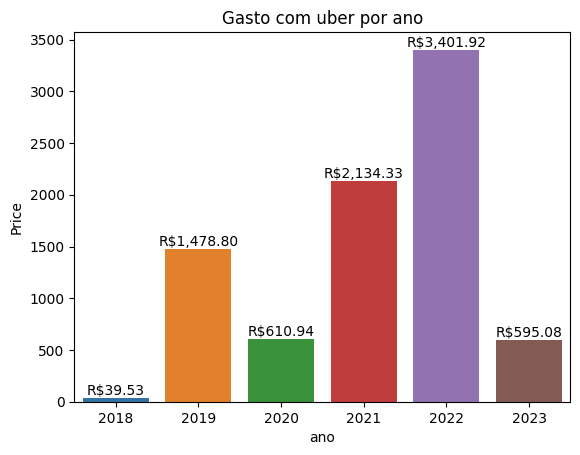

In [45]:
df_yearprice=gastos_ano.reset_index()
ax=sns.barplot(x='ano',y='Price',data=df_yearprice)
ax.set_title('Gasto com uber por ano')
for i in ax.containers:
    ax.bar_label(i, label_type='edge',labels=[f"R${x:,.2f}" for x in i.datavalues])

In [152]:
df_filtered = df_completed.loc[(df_completed['ano'] >= '2019') & (df_completed['ano'] <= '2022')]
df_grouped= df_filtered.groupby(['mes','ano'])['Price'].sum().reset_index()

df_grouped=df_grouped.set_index('mes')
df_grouped

,ano,Price
mes,,
01,2019,265.83
01,2020,104.50
01,2021,112.19
01,2022,63.55
02,2019,56.38
02,2020,229.51
02,2021,136.12
02,2022,152.75
03,2019,120.08


In [159]:
# Usar pivot_table para transformar o DataFrame
df_pivot = pd.pivot_table(df_grouped, values='Price', index=['mes'], columns=['ano'])

# Remover o nome das colunas do índice e dos cabeçalhos das colunas
df_pivot.columns.name = None
df_pivot.index.name = None


,2019,2020,2021,2022
01,265.83,104.50,112.19,63.55
02,56.38,229.51,136.12,152.75
03,120.08,37.63,29.30,324.65
04,74.85,NaN,63.96,347.37
05,67.43,NaN,210.09,313.56
06,183.32,NaN,238.10,198.91
07,90.88,NaN,199.41,152.99
08,126.59,21.80,228.21,294.39
09,60.38,66.09,233.19,364.39
10,101.57,66.26,351.82,551.04


Text(0, 0.5, 'Custo(R$)')

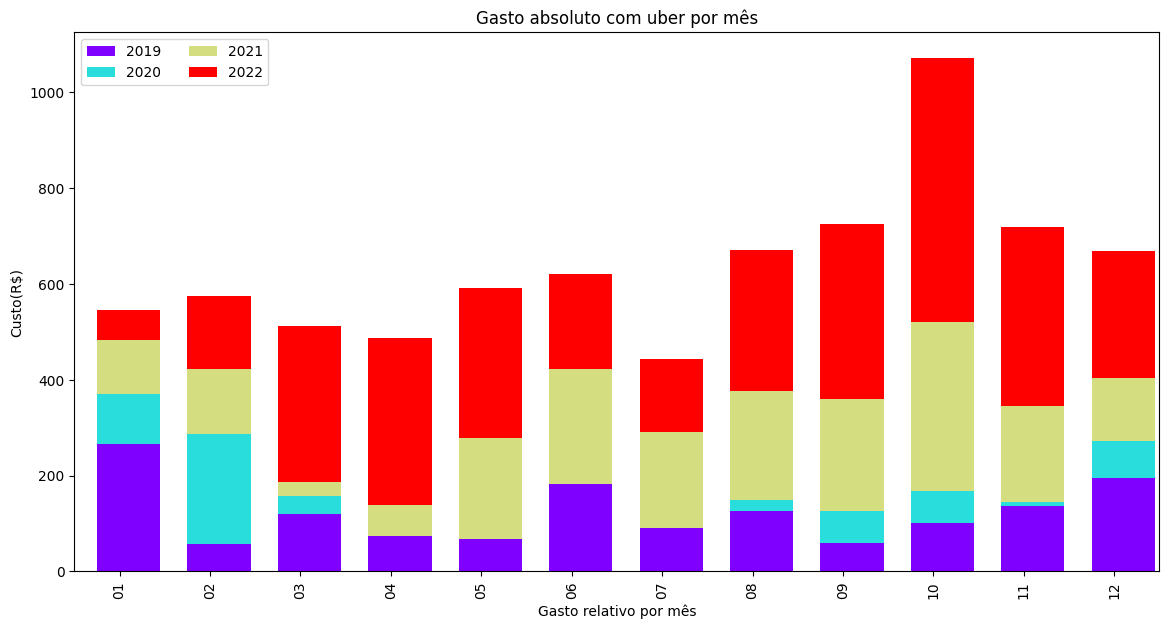

In [260]:
ax=df_pivot.plot(kind='bar',stacked='True',colormap='rainbow',figsize=(14,7))

for bar in ax.patches:
    bar.set(width=0.7)


# Adicione as legendas
plt.title("Gasto absoluto com uber por mês")
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Gasto relativo por mês")
plt.ylabel("Custo(R$)")

In [222]:
# Calcule a soma de cada índice (linha)
sum_index = df_pivot.sum(axis=1)

# Exiba a lista de soma por index
print(sum_index.tolist())

df_porcent = pd.DataFrame(columns=df_pivot.columns)

for col in df_pivot.columns:
    df_porcent[col] = (df_pivot[col] * 100) / sum_index

[546.0699999999999, 574.76, 511.65999999999997, 486.18, 591.0799999999999, 620.3299999999999, 443.28, 670.99, 724.05, 1070.69, 718.0999999999999, 668.8]


Text(0, 0.5, 'Porcentagem(%)')

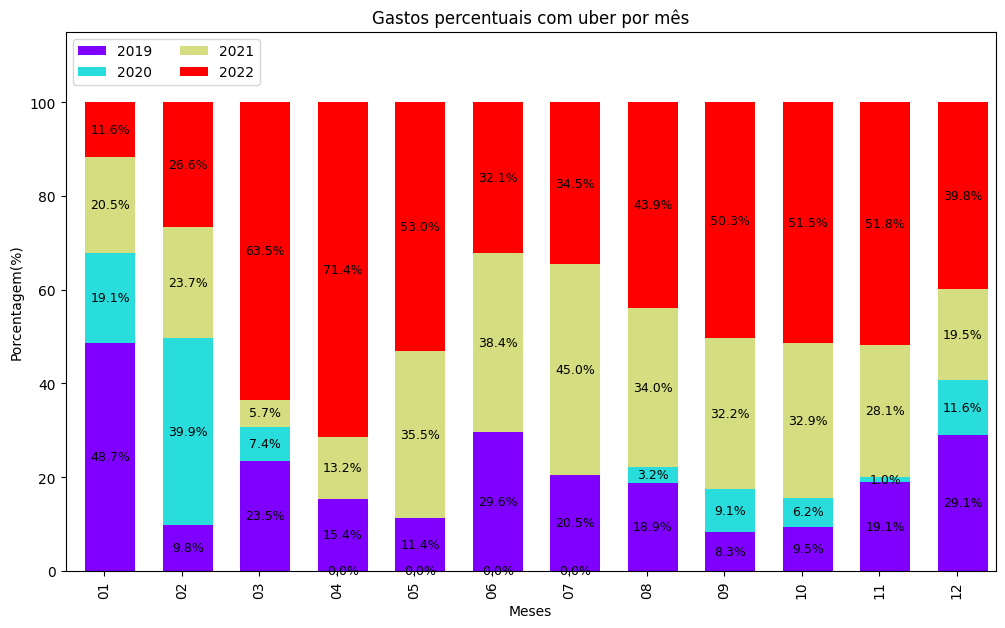

In [253]:
ax=df_porcent.plot(kind='bar',stacked='True',colormap='rainbow',figsize=(12,7))


for bar in ax.patches:
    bar.set(width=0.65)
# loop para adicionar valor dentro de cada barra
for i in ax.containers:
    ax.bar_label(i, label_type='center', labels=[f'{h.get_height():.1f}%' for h in i], fontsize=9)
    

ax.set_ylim([0,115])
# Adicione as legendas
plt.title("Gastos percentuais com uber por mês")
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Meses")
plt.ylabel("Porcentagem(%)")



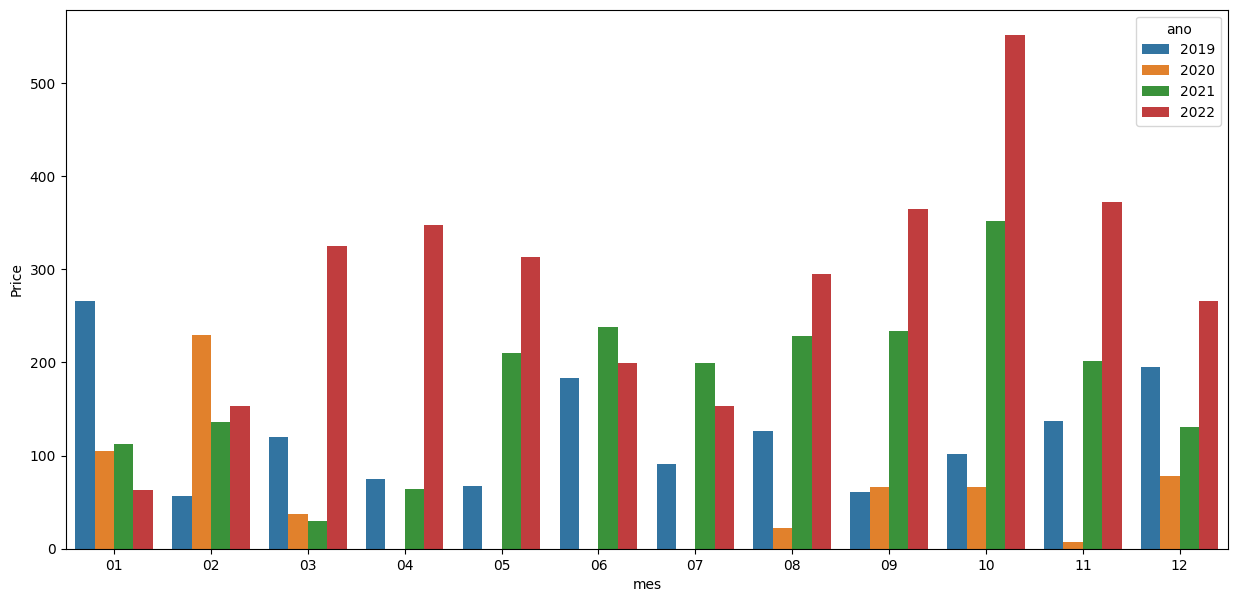

In [224]:


df_yearprice=gastos_ano.reset_index()
f,ax = plt.subplots(figsize=(15,7))
ax=sns.barplot(x='mes',y='Price',data=df_yearprice,width=0.8,hue='ano')

colors=list('k')


